In [3]:
#importing necessary libraries
import os
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization,LSTM,Bidirectional,MaxPooling2D,GlobalMaxPooling2D,TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
sns.set(style='darkgrid', color_codes=True)
%matplotlib inline

In [5]:
#google colab dataset import
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
#google colab dataset location in my drive
#path1 = '/content/drive/MyDrive/data/Lecture_data/grupo1.csv'
#path2 = '/content/drive/MyDrive/data/Lecture_data/grupo2.csv'

#My local drive dataset locations
path1 = 'F:/BRACU Files/Thesis/03 Datasets/09 Lecture of physiological activity with EEG techniques/Dataset/grupo1.csv'
path2 = 'F:/BRACU Files/Thesis/03 Datasets/09 Lecture of physiological activity with EEG techniques/Dataset/grupo2.csv'

In [12]:
eeg1 = pd.read_csv(path1)

In [14]:
#printing first few lines of the dataset
eeg1.head()

ref     Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
0    1  1.312944  1.595078  2.052118  1.194632  2.060042  5.915641  4.095422   
1    2  1.575985  0.386080  0.406565  0.316806  0.913926  1.919957  2.258599   
2    3  1.128774  0.968704  0.533195  0.464819  0.879756  2.787311  1.821016   
3    4  0.786495  0.069952  0.449110  0.474003  0.777745  0.597580  0.421172   
4    5  0.164870  0.616392  0.614360  0.944527  2.304733  1.755095  1.197162   

     Gamma2   Attention  Meditation student Sex  ID Group  
0  1.010316          83          47    01G1   F   1    G1  
1  0.777081          41          24    01G1   F   1    G1  
2  0.515770          17          21    01G1   F   1    G1  
3  0.154090           1          27    01G1   F   1    G1  
4  1.269859           1          48    01G1   F   1    G1

In [15]:
# listing the actual names of the columns
print(eeg1.columns.tolist())

['ref', '\xa0Delta', '\xa0Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', '\xa0Attention', 'Meditation', 'student', 'Sex', 'ID', 'Group']


In [16]:
# renaming few columns for good convention
eeg1 = eeg1.rename(columns={'ref':'References', '\xa0Delta':'Delta', '\xa0Theta':'Theta', '\xa0Attention':'Attention', 'student':'Student'})

In [17]:
eeg1.tail()

References     Delta     Theta    Alpha1    Alpha2     Beta1     Beta2  \
2159        2160  0.579105  0.293020  0.066368  0.265134  0.298419  0.304863   
2160        2161  0.392935  0.347373  1.671825  1.104414  1.205677  1.729595   
2161        2162  0.591924  0.312889  0.944726  1.079691  1.371305  2.684743   
2162        2163  1.232737  0.244041  0.210614  1.143238  1.423088  1.885294   
2163        2164  0.130805  0.286857  0.424180  0.129459  0.289529  0.974682   

        Gamma1    Gamma2  Attention  Meditation Student Sex  ID Group  
2159  1.086508  0.216433          1          47    08G1   M   8    G1  
2160  0.869025  1.614737          1          44    08G1   M   8    G1  
2161  1.976778  0.746352          1          24    08G1   M   8    G1  
2162  3.483450  0.692409         16          35    08G1   M   8    G1  
2163  0.615295  0.154090         20          40    08G1   M   8    G1

In [18]:
# column wise datapoint information
eeg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   References  2164 non-null   int64  
 1   Delta       2164 non-null   float64
 2   Theta       2164 non-null   float64
 3   Alpha1      2164 non-null   float64
 4   Alpha2      2164 non-null   float64
 5   Beta1       2164 non-null   float64
 6   Beta2       2164 non-null   float64
 7   Gamma1      2164 non-null   float64
 8   Gamma2      2164 non-null   float64
 9   Attention   2164 non-null   int64  
 10  Meditation  2164 non-null   int64  
 11  Student     2164 non-null   object 
 12  Sex         2164 non-null   object 
 13  ID          2164 non-null   int64  
 14  Group       2164 non-null   object 
dtypes: float64(8), int64(4), object(3)
memory usage: 253.7+ KB


In [19]:
# checking the missing values
print('Missing Values: ', eeg1.isna().sum().sum())

Missing Values:  0


In [20]:
# selecting valid data points and removing unnecessary columns
dataset = eeg1.copy()
dataset = dataset[dataset['Attention'] > 0]
dataset = dataset[dataset['Meditation'] > 0]
dataset_all = dataset.copy()
dataset.drop(columns = ['References','Student','Sex','ID','Group'],inplace=True)

In [21]:
num_features=len(dataset.columns)
print('Features:',num_features)

Features: 10


In [22]:
dataset.head()

Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
0  1.312944  1.595078  2.052118  1.194632  2.060042  5.915641  4.095422   
1  1.575985  0.386080  0.406565  0.316806  0.913926  1.919957  2.258599   
2  1.128774  0.968704  0.533195  0.464819  0.879756  2.787311  1.821016   
3  0.786495  0.069952  0.449110  0.474003  0.777745  0.597580  0.421172   
4  0.164870  0.616392  0.614360  0.944527  2.304733  1.755095  1.197162   

     Gamma2  Attention  Meditation  
0  1.010316         83          47  
1  0.777081         41          24  
2  0.515770         17          21  
3  0.154090          1          27  
4  1.269859          1          48

In [24]:
# generating dataset report using Pandas Profiling
profile = pd.get_dummies(dataset)
pp.ProfileReport(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

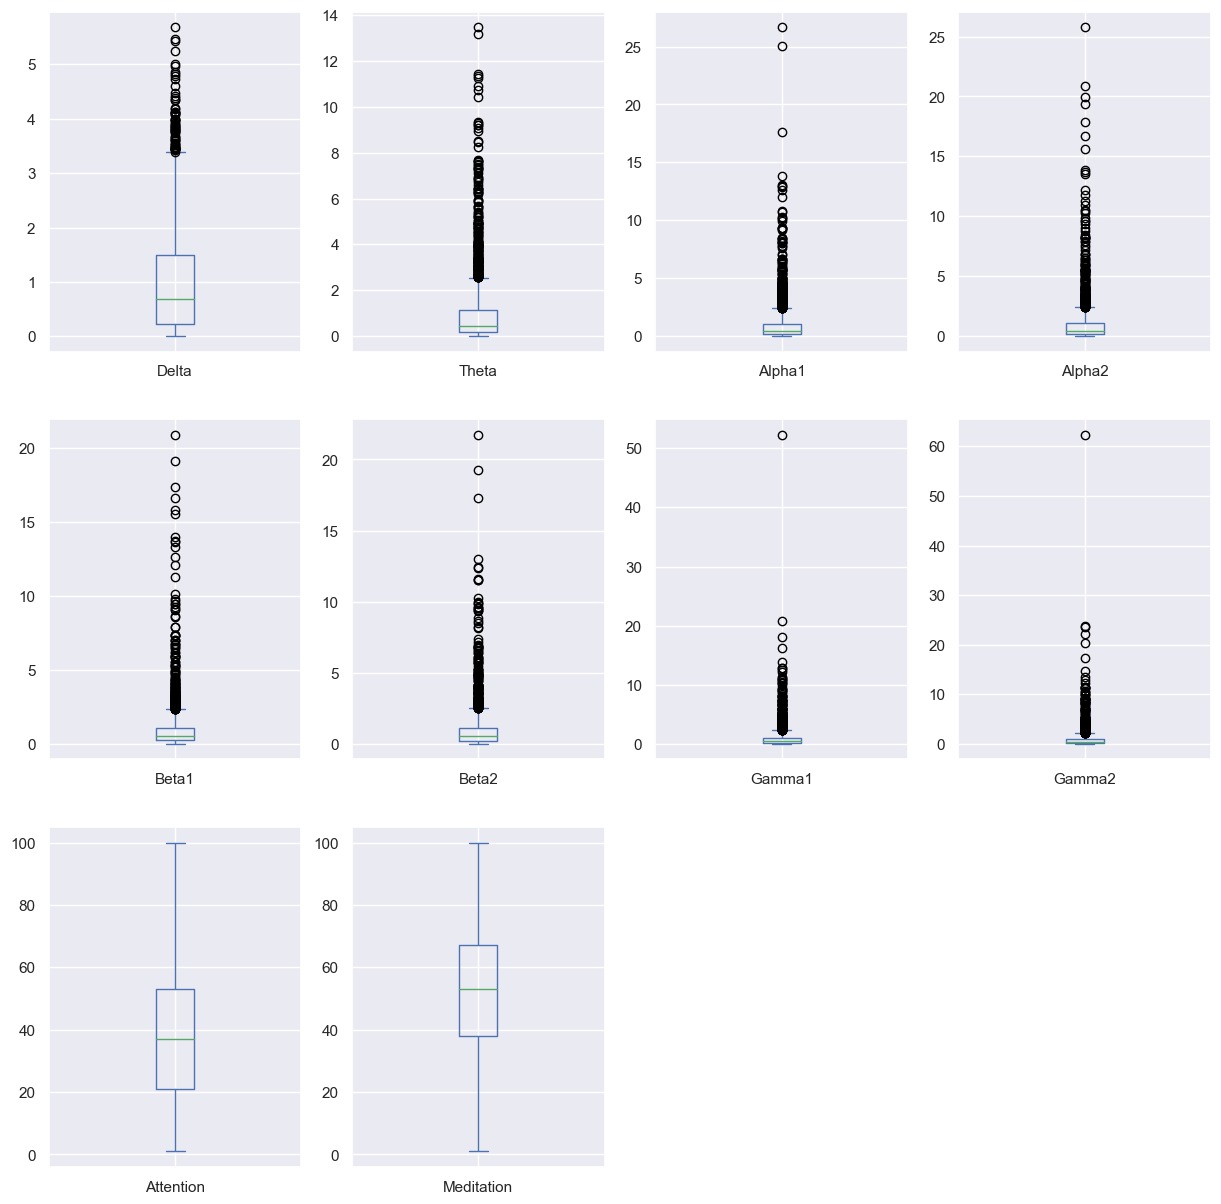

In [25]:
# visualizing the dataset using boxplotting
dataset.plot(kind='box', figsize=(15,15), subplots=True, layout=(3,4))
plt.show()

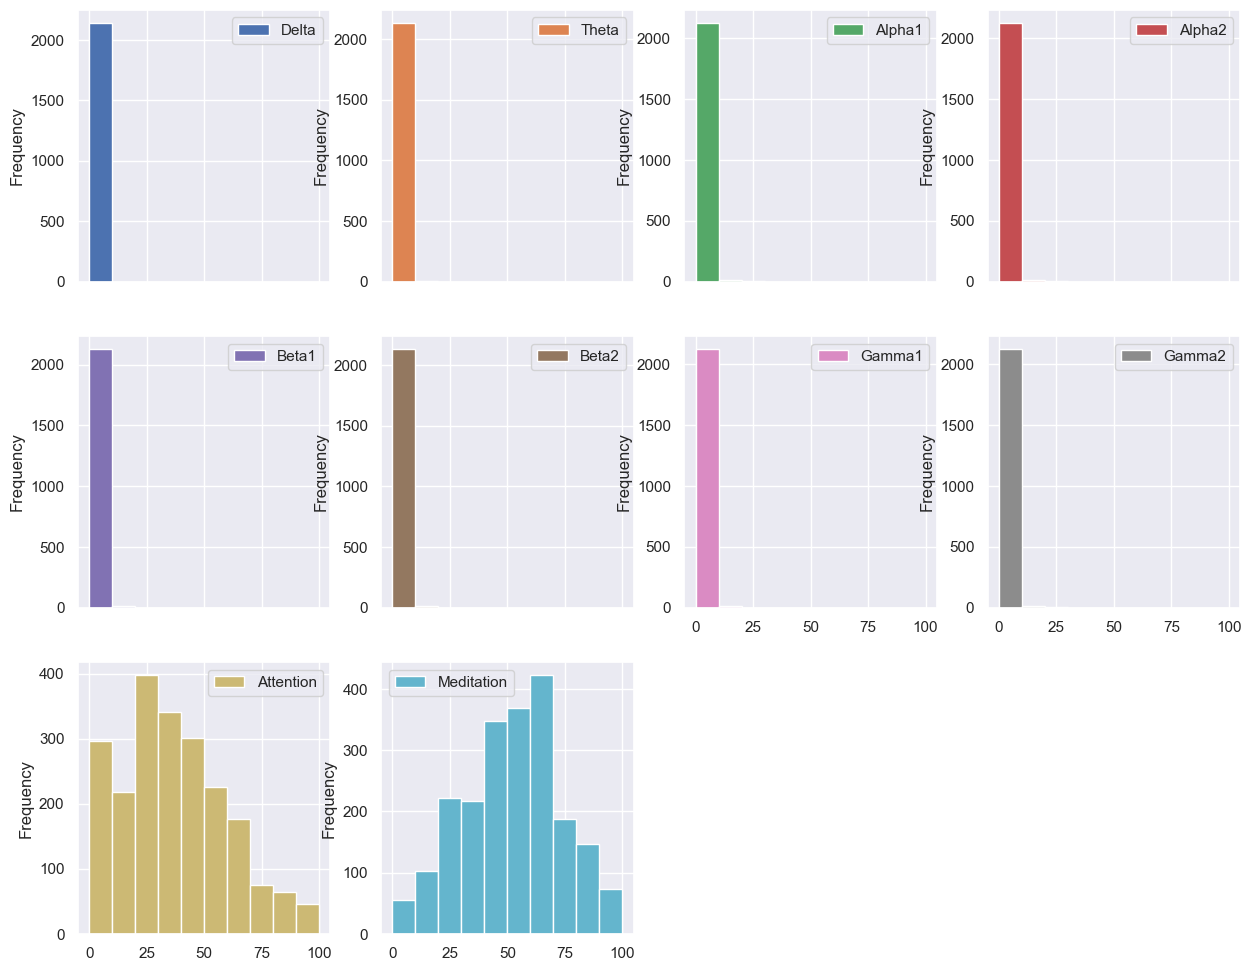

In [26]:
# visualizing dataset using histograms
dataset.plot(kind='hist', figsize=(15,12), subplots=True, layout=(3,4))
plt.show()

<Figure size 2000x2000 with 0 Axes>

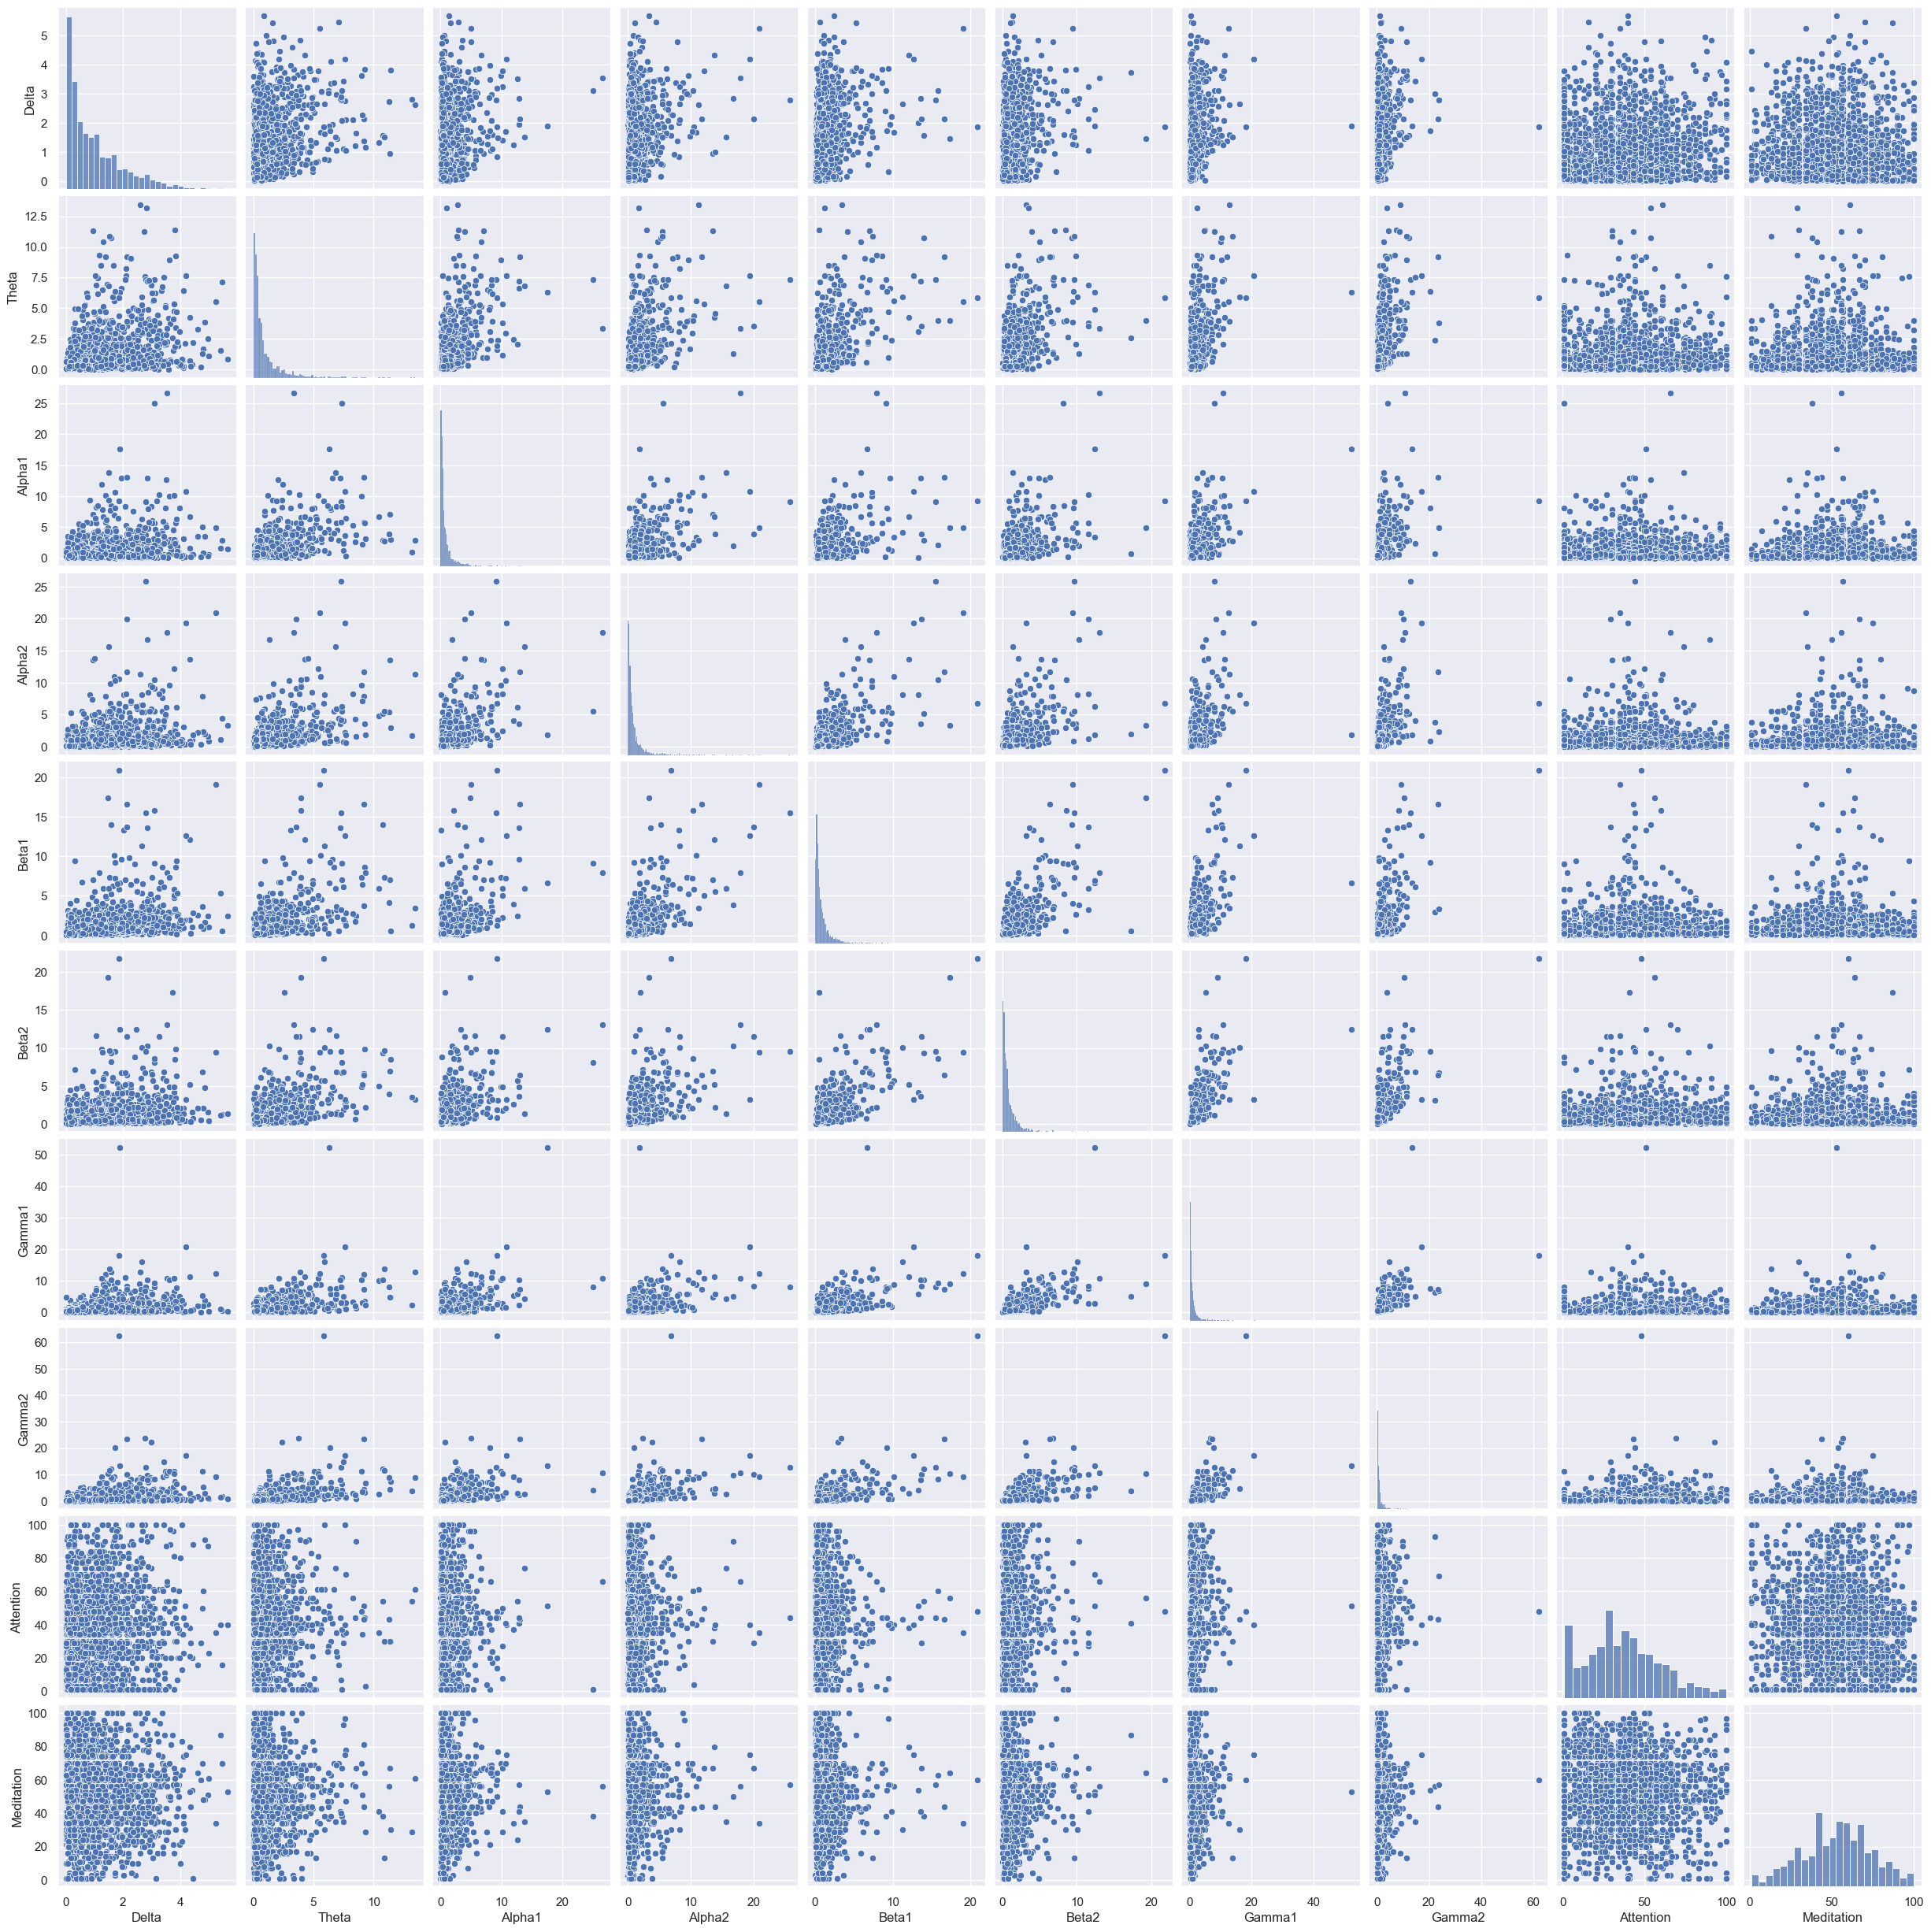

In [27]:
# visualizing dataset using pairplotting
plt.figure(figsize=(20,20))
sns.pairplot(dataset)
plt.show()

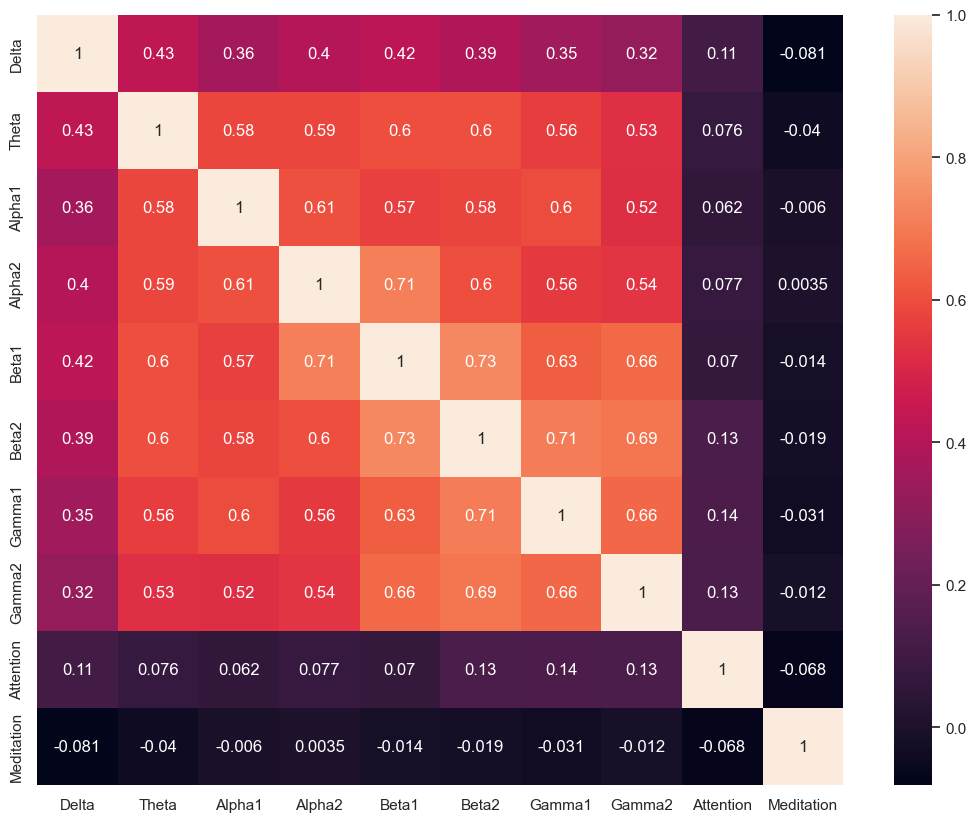

In [28]:
# visualizing dataset using heatmap (finding correletion between columns)
corr = dataset.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot: >

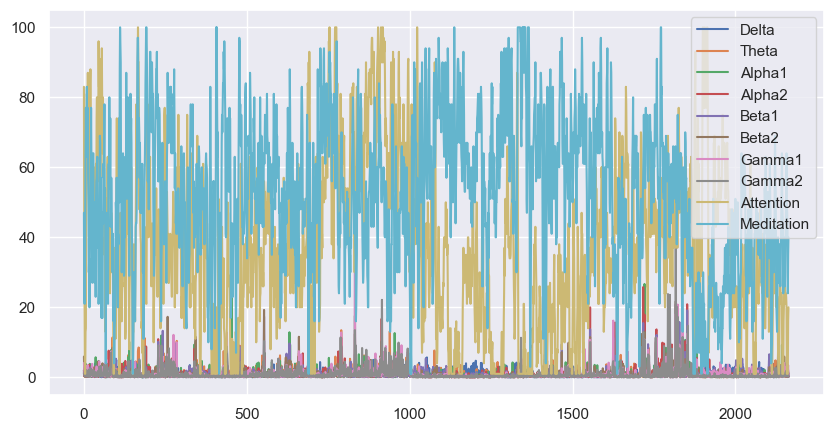

In [29]:
# visualizing dataset
dataset.plot(figsize = (10,5))

In [30]:
dataset.iloc[:10,:8]

Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
0  1.312944  1.595078  2.052118  1.194632  2.060042  5.915641  4.095422   
1  1.575985  0.386080  0.406565  0.316806  0.913926  1.919957  2.258599   
2  1.128774  0.968704  0.533195  0.464819  0.879756  2.787311  1.821016   
3  0.786495  0.069952  0.449110  0.474003  0.777745  0.597580  0.421172   
4  0.164870  0.616392  0.614360  0.944527  2.304733  1.755095  1.197162   
5  2.203101  2.617137  3.883186  1.947823  2.617765  2.066777  1.528320   
6  0.675543  0.816683  0.717469  1.227843  0.973487  2.326252  0.757263   
7  0.201260  0.265280  0.170719  0.103530  0.326422  0.275883  0.314545   
8  2.531677  3.233818  1.433832  1.785431  0.537499  2.193141  3.219249   
9  0.579105  0.293020  0.066368  0.265134  0.298419  0.304863  1.086508   

     Gamma2  
0  1.010316  
1  0.777081  
2  0.515770  
3  0.154090  
4  1.269859  
5  1.659173  
6  0.435740  
7  0.687988  
8  2.061531  
9  0.216433

In [31]:
# converting pandas dataframe into numpy array
X = dataset.copy()

In [32]:
#spreading the amount data using log normalization technique
X = StandardScaler().fit_transform(X)

<AxesSubplot: >

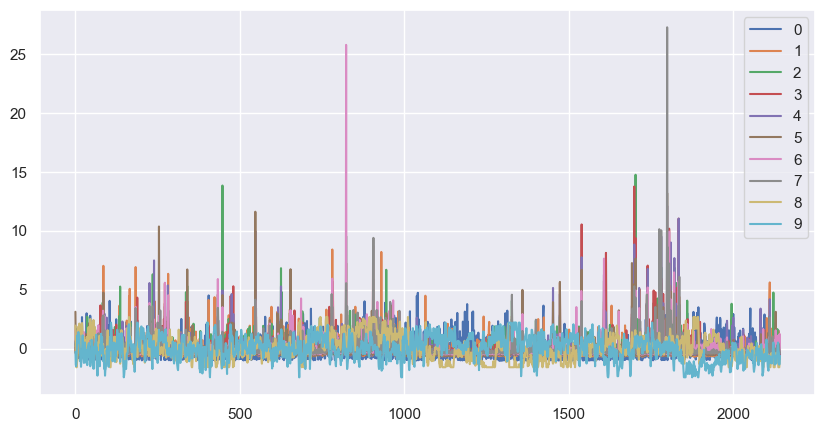

In [34]:
# plotting normalized data
pd.DataFrame(X).plot(figsize = (10,5))

In [35]:
# now are dataset is ready. Next step will be splitting the dataset and choose a model to train our data